In [1]:
import pandas as pd

data = pd.read_csv('wdbc.data', sep=",", header=None)

In [100]:
X = data.copy().drop([0,1],axis=1)
Y = data[1]
Y[Y=='M']=1
Y[Y=='B']=2

C:\Users\priboi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\priboi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [267]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
from random import randrange
import numpy as np
import matplotlib.pyplot as plt


In [336]:
sample_size = list(range(10,301))
weights = list()
accuracy = list()
lg_ls = list()
kl_div = list()


for i in range(10,301):
    avg_acc = list()
    avg_w = list()
    avg_lgls = list()
    for _ in range(80):
        a = randrange(1, 100)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=i,test_size=100, random_state=a,shuffle=True,stratify=Y)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        Y_train = list(Y_train)
        Y_test = list(Y_test)
        lg = LogisticRegression(solver='sag',multi_class='ovr',max_iter=500)
        lg.fit(X_train_scaled,Y_train)
        avg_acc.append(accuracy_score(Y_test,lg.predict(X_test_scaled)))
        avg_w.append(lg.coef_[0])
        avg_lgls.append(log_loss(Y_test,lg.predict(X_test_scaled)))
    accuracy.append(np.mean(avg_acc))
    weights.append(np.asarray(avg_w))
    lg_ls.append(np.mean(avg_lgls))

In [376]:
def KL_div_norm(dist1,dist2):
    mean1 = np.mean(dist1, axis=0)
    cov1 = np.cov(dist1, rowvar=0)
    mean2 = np.mean(dist2, axis=0)
    cov2 = np.cov(dist2, rowvar=0)
    #div = np.exp(-0.5*np.dot(np.dot(mean1-mean2,np.linalg.inv(cov1+cov2)),mean1-mean2))
    div = 0.5*(np.trace(np.dot(np.linalg.inv(cov2),cov1)) + np.dot(np.dot((mean2-mean1),np.linalg.inv(cov2)),(mean2-mean1)) - cov2.shape[0] + np.log(np.linalg.det(cov2)/np.linalg.det(cov1)))
    return div

In [404]:
kl_div = list()

for i in range(291):
    if i < 219:
        kl_div.append(KL_div_norm(weights[i],weights[i+72]))

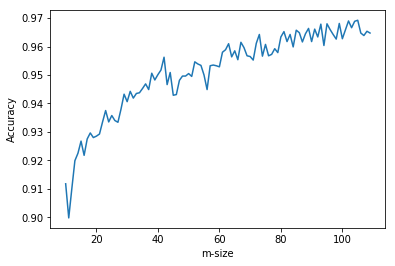

In [410]:
plt.plot(sample_size[:100],accuracy[:100])
plt.xlabel('m-size')
plt.ylabel('Accuracy')
plt.savefig('Accuracy')
plt.show()

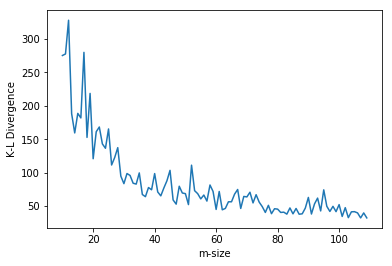

In [408]:
plt.plot(sample_size[:100],kl_div[:100])
plt.xlabel('m-size')
plt.ylabel('K-L Divergence')
plt.savefig('K-L')
plt.show()

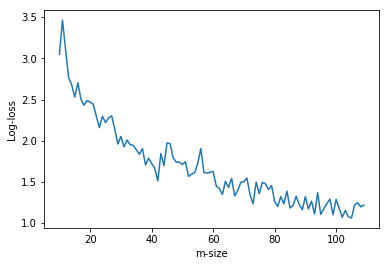

In [411]:
plt.plot(sample_size[:100],lg_ls[:100])
plt.xlabel('m-size')
plt.ylabel('Log-loss')
plt.savefig('Log-loss')
plt.show()